In [1]:
import csv
from textblob import TextBlob
import os
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from textblob.sentiments import NaiveBayesAnalyzer
from nltk.corpus import stopwords
import string
import nltk 
import textmining
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [3]:
os.chdir("C:/Users/Navaneeth/Desktop/Edwisor/Text Mining")
post = pd.read_csv("post.csv")
post.shape

(28718, 2)

In [4]:
post = post.iloc[:1000,]
post.head(10)

,Id,Post
0,1,cumin seed) and Hepatitis
1,2,iron overload chelation diabetes and hepatitis
2,3,please help me.
3,4,two different test results!
4,5,miscarriage and devastation..!!
5,6,Heart Dysfunction Tied in Thalassemia. Take V...
6,7,arthritis and fibromyalgia
7,8,Exjade)
8,9,please help!
9,10,Good News? Yeah I guess so :)


In [5]:
# Extract stop words
stop = set(stopwords.words("english"))

# Remove punctuation marks
exclude = set(string.punctuation)

In [5]:
stop

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [6]:
exclude

{'!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~'}

In [11]:
post.head(20)

,Id,Post
0,1,cumin seed) and Hepatitis
1,2,iron overload chelation diabetes and hepatitis
2,3,please help me.
3,4,two different test results!
4,5,miscarriage and devastation..!!
5,6,Heart Dysfunction Tied in Thalassemia. Take V...
6,7,arthritis and fibromyalgia
7,8,Exjade)
8,9,please help!
9,10,Good News? Yeah I guess so :)


In [6]:
# Text pre processing
def clean(doc):
    stop_free = ' '.join([i for i in doc.lower().split() if i not in stop])
   # stop_free = ''.join([i for i in doc.lower().split() if i not in stop])
    punc_free = ''.join([i for i in stop_free if i not in exclude])
    num_free = ''.join([i for i in punc_free if not i.isdigit()])
    return num_free

post_corpus = [clean(post.iloc[i,1]) for i in range(0, post.shape[0])]

In [6]:
post_corpus[10]

'liver '

In [7]:
post_corpus[0]

'cumin seed hepatitis'

In [85]:
post_corpus[14]

'  '

In [36]:
post_corpus[17]

'help me im suffering worse fatigue dizzy'

In [83]:
post_corpus[8]

'please help'

In [52]:
x='please come here!'
a=x.split()
print(a)


['please', 'come', 'here!']


In [57]:
type(stop)

set

In [58]:
ex= stopwords.words("english")

In [59]:
ex

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [60]:
type(ex)

list

In [61]:
ex2=string.punctuation
print(ex2,type(ex2))

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~ <class 'str'>


In [62]:
type(a)

list

In [67]:
list1=['g','e','e','k','s']
print(''.join(list1))

geeks


In [7]:
# Create document term matrix
tdm = textmining.TermDocumentMatrix()

for i in post_corpus:
    
    tdm.add_doc(i)

In [8]:
# Write tdm
 # Write out the matrix to a csv file. Note that setting cutoff=1 means
    # that words which appear in 1 or more documents will be included in
    # the output (i.e. every word will appear in the output). The default
    # for cutoff is 2, since we usually aren't interested in words which
    # appear in a single document. For this example we want to see all
    # words however, hence cutoff=1.
tdm.write_csv("TDM_DataFrame.csv", cutoff = 1)

In [9]:
# Load dataframe for analysis
df = pd.read_csv("TDM_DataFrame.csv")
df.shape

(1000, 7393)

In [10]:
df.head(20)

,cumin,seed,hepatitis,iron,overload,chelation,diabetes,please,help,me,...,discusssion,accuracy,baal,kow,compact,homei,gel,wet,cloth,fixed
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
df['hepatitis']

0      1
1      1
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
      ..
970    0
971    0
972    0
973    0
974    0
975    0
976    0
977    0
978    0
979    0
980    0
981    0
982    0
983    0
984    0
985    0
986    0
987    0
988    0
989    0
990    0
991    0
992    0
993    0
994    0
995    0
996    0
997    0
998    0
999    0
Name: hepatitis, Length: 1000, dtype: int64

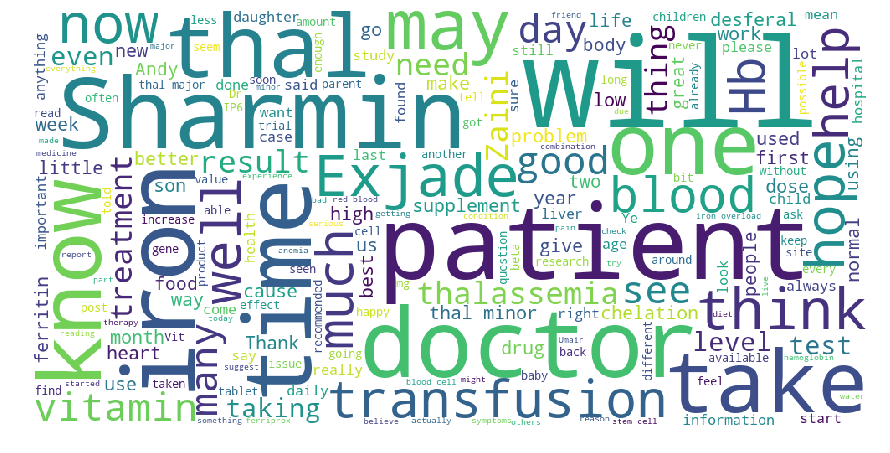

In [20]:
#Plot wordcloud
wordcloud = WordCloud(width = 1000, height = 500, stopwords = STOPWORDS, background_color = 'white').generate(''.join(post['Post']))

plt.figure(figsize = (15,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
#wordcloud.to_file("wordcloud_Python.png")

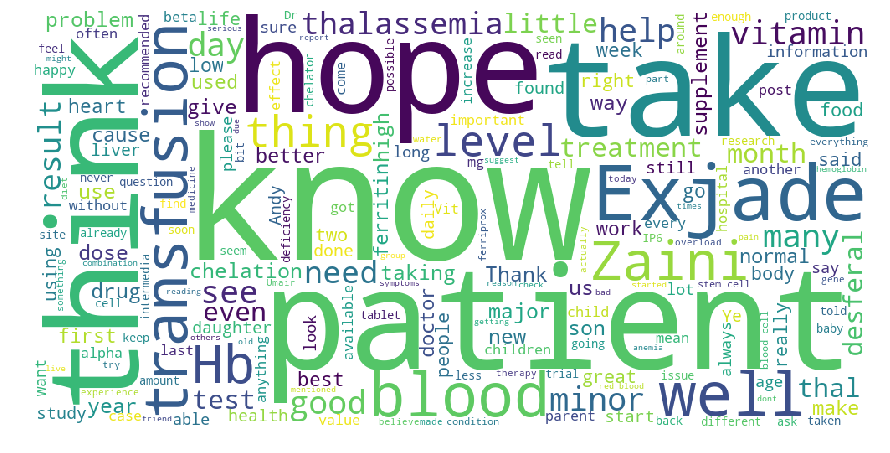

In [22]:
stopwords=set(STOPWORDS)
stopwords.update(['now','thal','iron','patient','doctor','Sharmin','will','one','time','may','much'])

wordcloud = WordCloud(width = 1000, height = 500, stopwords = stopwords, background_color = 'white').generate(''.join(post['Post']))

plt.figure(figsize = (15,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()